Tingkat Stres Prediksi: 6.743589743589743


C:\Users\pamul\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


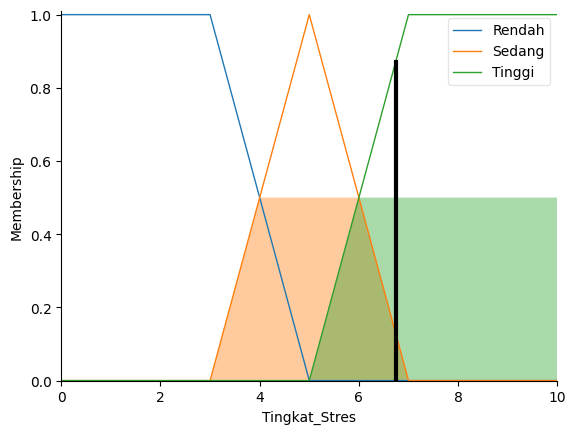

In [1]:
# 1. Sistem Prediksi Tingkat Stres Mahasiswa

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisikan variabel fuzzy
jam_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'Jam_Tidur')
jam_belajar = ctrl.Antecedent(np.arange(0, 11, 1), 'Jam_Belajar')
tingkat_stres = ctrl.Consequent(np.arange(0, 11, 1), 'Tingkat_Stres')

# 2. Definisikan himpunan fuzzy untuk setiap variabel
jam_tidur['Kurang'] = fuzz.trapmf(jam_tidur.universe, [0, 0, 3, 5])
jam_tidur['Cukup'] = fuzz.trimf(jam_tidur.universe, [3, 5, 7])
jam_tidur['Banyak'] = fuzz.trapmf(jam_tidur.universe, [5, 7, 10, 10])

jam_belajar['Sedikit'] = fuzz.trapmf(jam_belajar.universe, [0, 0, 2, 4])
jam_belajar['Cukup'] = fuzz.trimf(jam_belajar.universe, [2, 4, 6])
jam_belajar['Banyak'] = fuzz.trapmf(jam_belajar.universe, [4, 6, 10, 10])

tingkat_stres['Rendah'] = fuzz.trapmf(tingkat_stres.universe, [0, 0, 3, 5])
tingkat_stres['Sedang'] = fuzz.trimf(tingkat_stres.universe, [3, 5, 7])
tingkat_stres['Tinggi'] = fuzz.trapmf(tingkat_stres.universe, [5, 7, 10, 10])

# 3. Definisikan aturan fuzzy
rule1 = ctrl.Rule(jam_tidur['Kurang'] & jam_belajar['Sedikit'], tingkat_stres['Tinggi'])
rule2 = ctrl.Rule(jam_tidur['Kurang'] & jam_belajar['Cukup'], tingkat_stres['Tinggi'])
rule3 = ctrl.Rule(jam_tidur['Kurang'] & jam_belajar['Banyak'], tingkat_stres['Tinggi'])
rule4 = ctrl.Rule(jam_tidur['Cukup'] & jam_belajar['Sedikit'], tingkat_stres['Sedang'])
rule5 = ctrl.Rule(jam_tidur['Cukup'] & jam_belajar['Cukup'], tingkat_stres['Sedang'])
rule6 = ctrl.Rule(jam_tidur['Cukup'] & jam_belajar['Banyak'], tingkat_stres['Sedang'])
rule7 = ctrl.Rule(jam_tidur['Banyak'] & jam_belajar['Sedikit'], tingkat_stres['Rendah'])
rule8 = ctrl.Rule(jam_tidur['Banyak'] & jam_belajar['Cukup'], tingkat_stres['Rendah'])
rule9 = ctrl.Rule(jam_tidur['Banyak'] & jam_belajar['Banyak'], tingkat_stres['Rendah'])

# 4. Membuat sistem kontrol fuzzy dan menjalankan inferensi
sistem_stres = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
prediksi_stres = ctrl.ControlSystemSimulation(sistem_stres)

# 5. Input untuk prediksi
prediksi_stres.input['Jam_Tidur'] = 4  # Input jumlah jam tidur
prediksi_stres.input['Jam_Belajar'] = 6  # Input jumlah jam belajar

# 6. Menjalankan inferensi
prediksi_stres.compute()

# 7. Output prediksi tingkat stres
print(f"Tingkat Stres Prediksi: {prediksi_stres.output['Tingkat_Stres']}")
tingkat_stres.view(sim=prediksi_stres)


Tingkat Stres Prediksi: 7.740740740740741


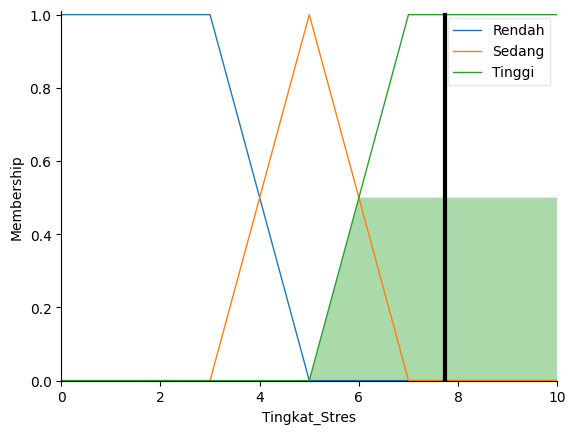

In [3]:
2. Buat sistem untuk memprediksi tingkat stres berdasarkan parameter seperti jumlah tugas, lama waktu belajar, dan lama waktu tidur.

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisikan variabel fuzzy
jumlah_tugas = ctrl.Antecedent(np.arange(0, 11, 1), 'Jumlah_Tugas')
waktu_belajar = ctrl.Antecedent(np.arange(0, 11, 1), 'Waktu_Belajar')
waktu_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'Waktu_Tidur')
tingkat_stres = ctrl.Consequent(np.arange(0, 11, 1), 'Tingkat_Stres')

# 2. Definisikan himpunan fuzzy untuk setiap variabel
jumlah_tugas['Sedikit'] = fuzz.trapmf(jumlah_tugas.universe, [0, 0, 3, 5])
jumlah_tugas['Cukup'] = fuzz.trimf(jumlah_tugas.universe, [3, 5, 7])
jumlah_tugas['Banyak'] = fuzz.trapmf(jumlah_tugas.universe, [5, 7, 10, 10])

waktu_belajar['Sedikit'] = fuzz.trapmf(waktu_belajar.universe, [0, 0, 2, 4])
waktu_belajar['Cukup'] = fuzz.trimf(waktu_belajar.universe, [2, 4, 6])
waktu_belajar['Banyak'] = fuzz.trapmf(waktu_belajar.universe, [4, 6, 10, 10])

waktu_tidur['Sedikit'] = fuzz.trapmf(waktu_tidur.universe, [0, 0, 3, 5])
waktu_tidur['Cukup'] = fuzz.trimf(waktu_tidur.universe, [3, 5, 7])
waktu_tidur['Banyak'] = fuzz.trapmf(waktu_tidur.universe, [5, 7, 10, 10])

tingkat_stres['Rendah'] = fuzz.trapmf(tingkat_stres.universe, [0, 0, 3, 5])
tingkat_stres['Sedang'] = fuzz.trimf(tingkat_stres.universe, [3, 5, 7])
tingkat_stres['Tinggi'] = fuzz.trapmf(tingkat_stres.universe, [5, 7, 10, 10])

# 3. Definisikan aturan fuzzy
rule1 = ctrl.Rule(jumlah_tugas['Banyak'] & waktu_belajar['Banyak'] & waktu_tidur['Sedikit'], tingkat_stres['Tinggi'])
rule2 = ctrl.Rule(jumlah_tugas['Banyak'] & waktu_belajar['Banyak'] & waktu_tidur['Cukup'], tingkat_stres['Tinggi'])
rule3 = ctrl.Rule(jumlah_tugas['Banyak'] & waktu_belajar['Cukup'] & waktu_tidur['Sedikit'], tingkat_stres['Tinggi'])
rule4 = ctrl.Rule(jumlah_tugas['Cukup'] & waktu_belajar['Banyak'] & waktu_tidur['Cukup'], tingkat_stres['Sedang'])
rule5 = ctrl.Rule(jumlah_tugas['Cukup'] & waktu_belajar['Cukup'] & waktu_tidur['Banyak'], tingkat_stres['Sedang'])
rule6 = ctrl.Rule(jumlah_tugas['Sedikit'] & waktu_belajar['Sedikit'] & waktu_tidur['Banyak'], tingkat_stres['Rendah'])
rule7 = ctrl.Rule(jumlah_tugas['Sedikit'] & waktu_belajar['Cukup'] & waktu_tidur['Cukup'], tingkat_stres['Rendah'])
rule8 = ctrl.Rule(jumlah_tugas['Banyak'] & waktu_belajar['Sedikit'] & waktu_tidur['Banyak'], tingkat_stres['Sedang'])

# 4. Membuat sistem kontrol fuzzy dan menjalankan inferensi
sistem_stres = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
prediksi_stres = ctrl.ControlSystemSimulation(sistem_stres)

# 5. Input untuk prediksi
prediksi_stres.input['Jumlah_Tugas'] = 7  # Input jumlah tugas
prediksi_stres.input['Waktu_Belajar'] = 6  # Input lama waktu belajar (jam)
prediksi_stres.input['Waktu_Tidur'] = 4  # Input lama waktu tidur (jam)

# 6. Menjalankan inferensi
prediksi_stres.compute()

# 7. Output prediksi tingkat stres
print(f"Tingkat Stres Prediksi: {prediksi_stres.output['Tingkat_Stres']}")
tingkat_stres.view(sim=prediksi_stres)
